In [1]:
using Pkg;
Pkg.activate(".");
Pkg.instantiate();
using LinearAlgebra, DataFrames, Plots, StatsPlots, LaTeXStrings; pyplot();
using Random, PyCall, Statistics, StatsBase, MLDataUtils;
using JLD;
include("nntutorial.jl");

 Activating environment at `~/Documents/GitHub/NNtutorial/Project.toml`


    Cloning git-repo `https://github.com/JuliaML/MLPreprocessing.jl`


    Fetching: [==========================>              

Fetching: [========================================>]  100.0 %

  Installed nghttp2_jll ───────────── v1.40.0+2
  Installed BFloat16s ─────────────── v0.1.0
  Installed LibSSH2_jll ───────────── v1.9.0+3
  Installed IRTools ───────────────── v0.4.2
  Installed StaticArrays ──────────── v1.0.1
  Installed Zygote ────────────────── v0.5.17
  Installed Flux ──────────────────── v0.11.3
  Installed MLDatasets ────────────── v0.5.3
  Installed ComputationalResources ── v0.3.2
  Installed ScientificTypes ───────── v1.1.1
  Installed MappedArrays ──────────── v0.3.0
  Installed Hwloc_jll ─────────────── v2.2.0+0
  Installed Blosc_jll ─────────────── v1.14.3+1
  Installed GPUCompiler ───────────── v0.8.3
  Installed SLEEFPirates ──────────── v0.6.3
  Installed GPUArrays ─────────────── v6.2.0
  Installed LibCURL_jll ───────────── v7.70.0+2
  Installed Syslogs ───────────────── v0.3.0
  Installed Juno ──────────────────── v0.8.4
  Installed MLJTuning ─────────────── v0.6.0
  Installed BinDeps ───────────────── v1.0.2
  Installed HTTP ──────────────────── v0

LoadError: ArgumentError: Package StatsPlots not found in current path:
- Run `import Pkg; Pkg.add("StatsPlots")` to install the StatsPlots package.


In [2]:
mnist_data = load("mnist_data.jld");

In [3]:
images = mnist_data["jl_images"];
targets = mnist_data["jl_targets"];
data = mnist_data["jl_data"];

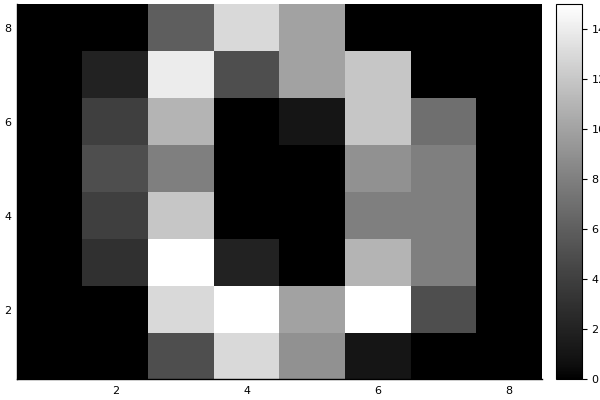

In [4]:
# visualization 
heatmap(images[1,:,:], color = :greys)

In [5]:
# normalize the data
X = standardize(ZScoreTransform, data, dims=1);
function remove_nans(x)
    if isnan(x)
        return 0.0
    else 
        return x
    end
end
X = remove_nans.(X);

In [6]:
# split the data
(x_train,y_train), (x_test,y_test) = splitobs((X', targets), at = 0.6);

In [7]:
yvtrain = nntutorial.convertytovect(y_train);
yvtest = nntutorial.convertytovect(y_test);

In [8]:
nn_structure = (64,30,10);

In [9]:
W, b, avg_cost_func = nntutorial.train_nn(nn_structure, x_train', yvtrain);

Starting gradient descent for 3000 iterations.
Iteration 0 of 3000 iterations.
Iteration 1000 of 3000 iterations.
Iteration 2000 of 3000 iterations.


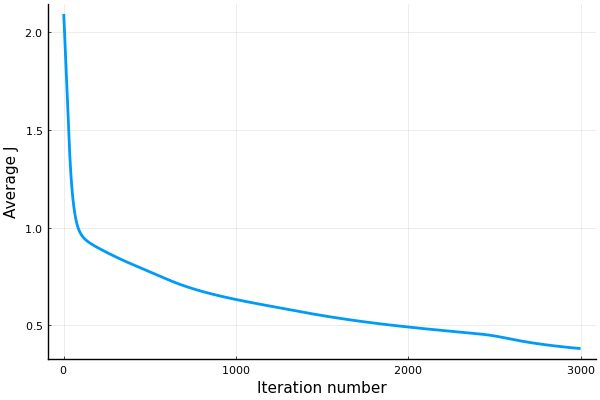

In [10]:
plot(avg_cost_func,legend=false,lw=2)
xlabel!("Iteration number")
ylabel!("Average J")

In [11]:
y_pred = nntutorial.predict_y(W,b,x_test',3);

In [12]:
skmets = pyimport("sklearn.metrics"); # import metrics from python

In [13]:
score = skmets.accuracy_score(y_test,y_pred .- 1)*100 # score

77.74687065368568